In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [4]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [5]:
import sklearn
from sklearn.metrics import mean_squared_error

In [6]:
#Load and understand the data
data = pd.read_csv('/content/sample_data/GlobalSuperstoreData.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [7]:
#Check the shape of the data
data.shape

(51290, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [9]:
#Check the numarical data stats
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


**Exploratary Data Analysis**

In [10]:
#Missing values
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [11]:
#Outliers
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
90%,632.225736,112.680000
95%,1015.955640,211.500000
99%,2301.000000,587.359950


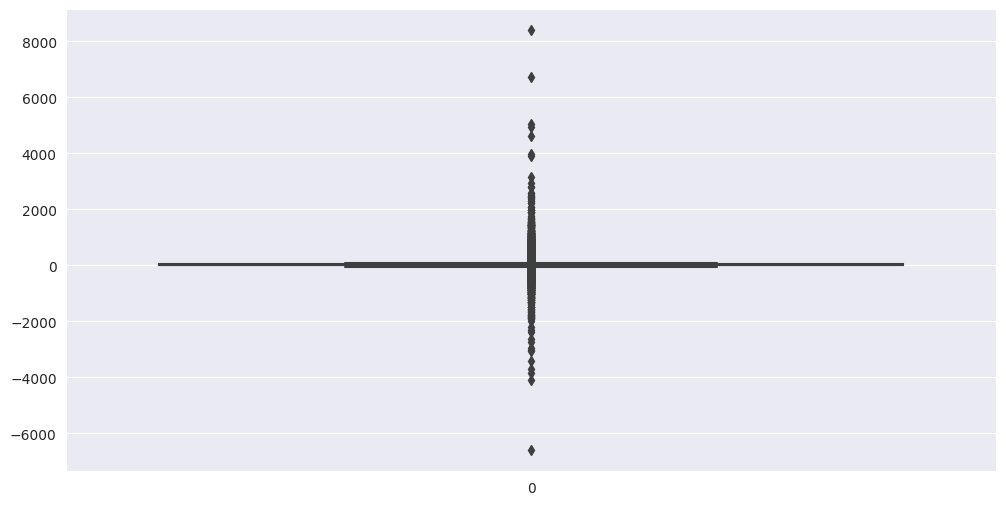

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Profit'])
plt.show()

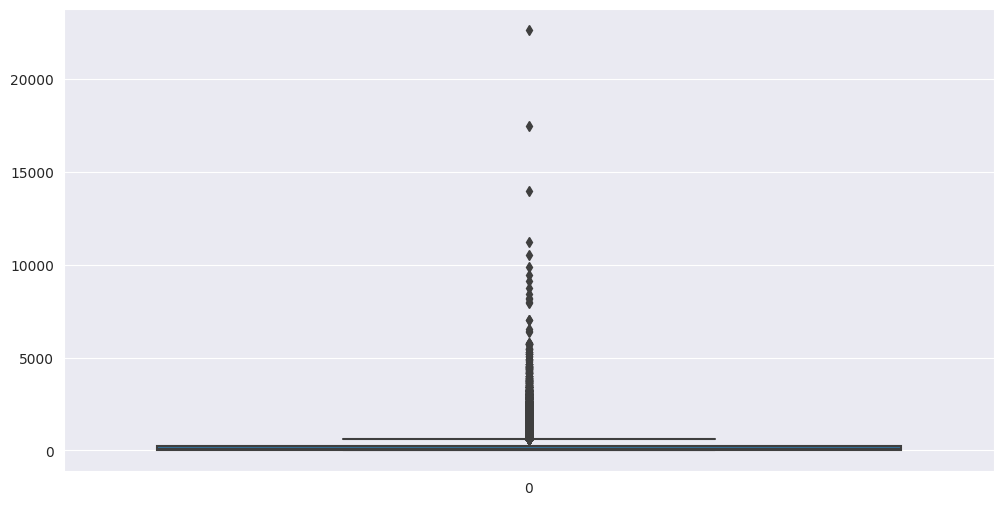

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

Inference: We can clearly see that there are outliers in the dataset.

But we will keep the outliers as they are. We cannot delete them as this is a time series data and deleting these data will lead to discontinuity in the data.

In [14]:
#Univariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


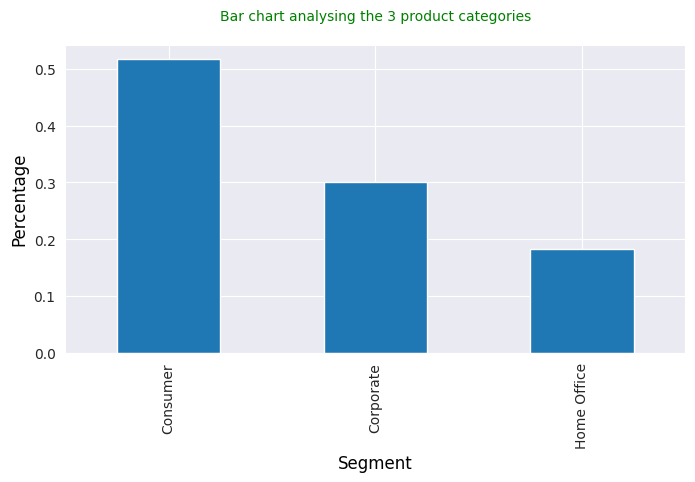

In [15]:
from sklearn.preprocessing import normalize
#Segment column
plt.figure(figsize=(8,4))
data["Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 3 product categories\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

Inference: Consumer category forms the most in demand product category worldwide for Global Mart

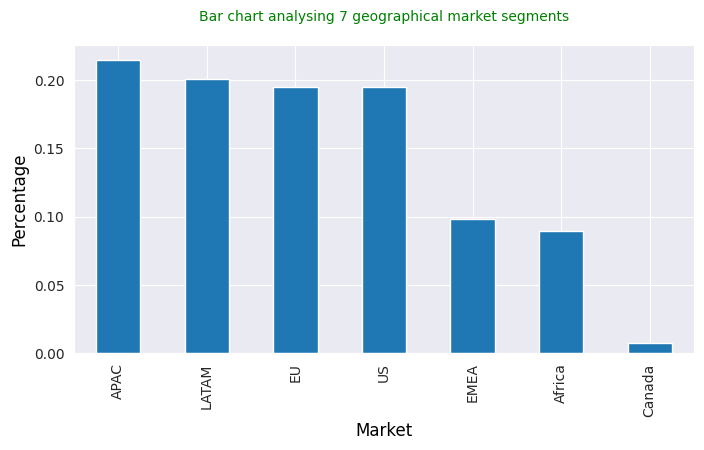

In [16]:
#Market column
plt.figure(figsize= (8,4))
data["Market"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing 7 geographical market segments\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

Inference: APAC segment is the most important market segment for Gloabal Mart since most shipments take place in APAC region

In [17]:
#Bivariate Analysis

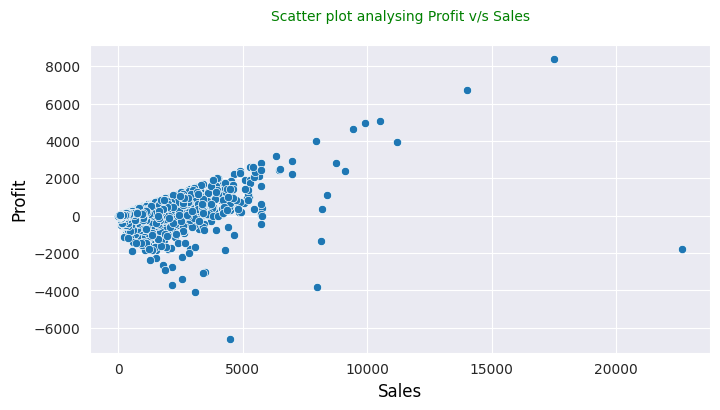

In [20]:
#Profit vs Sales
plt.figure(figsize=[8,4])
sns.scatterplot(x=data['Sales'],y=data['Profit'])
plt.title("Scatter plot analysing Profit v/s Sales\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Sales", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Profit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

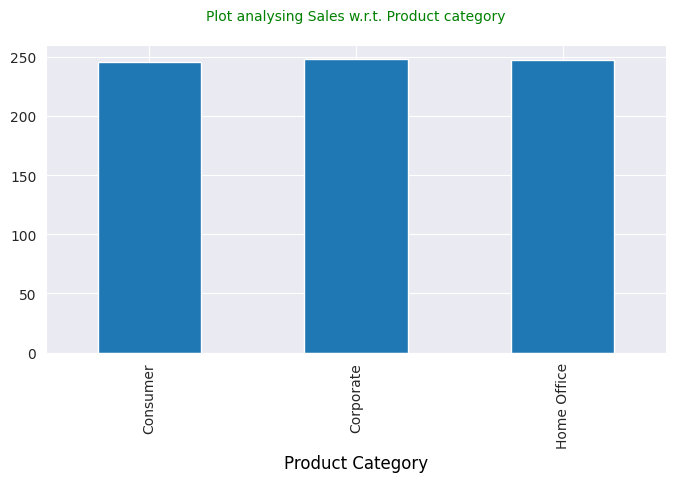

In [21]:
# Sales w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Product category\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Inference: Through Consumer is the leading category, Coporate category comprises of highest sales amounts.

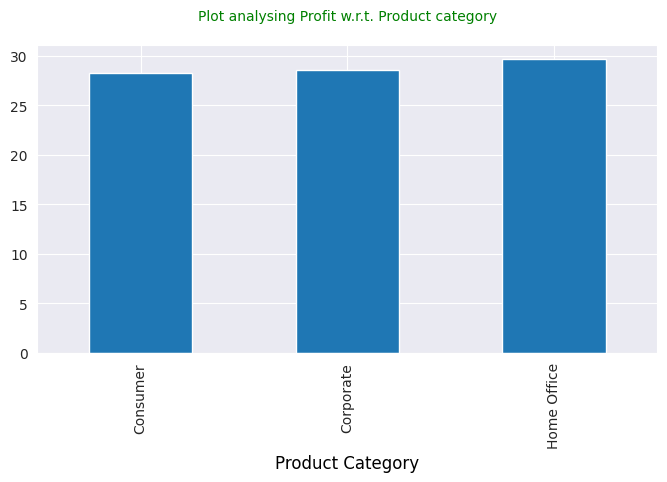

In [22]:
# Profit w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Product category\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Inference : Home office category makes highest profits.

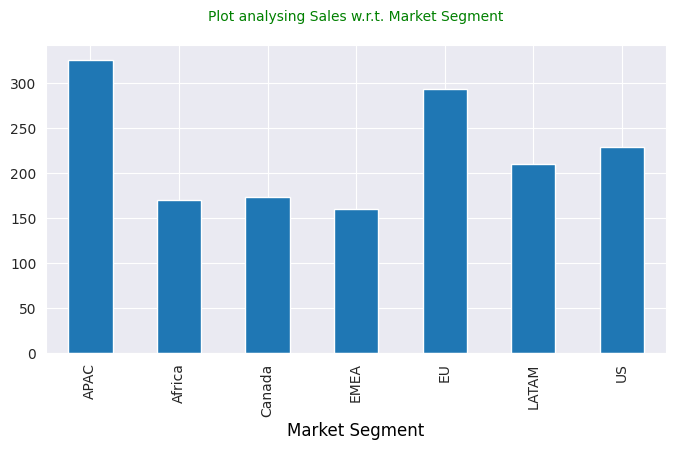

In [23]:
# Sales w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Market Segment\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Inference : APAC region has highest Sales.

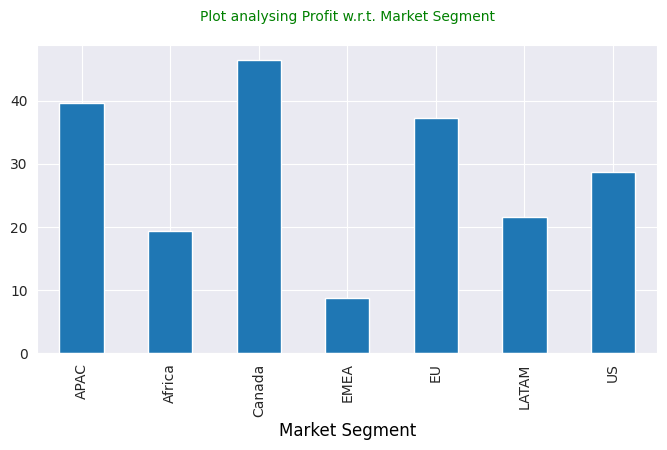

In [24]:
# Profit w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Market Segment\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Inference : Canada region makes highest profits

In [25]:
#Multivariate Analysis

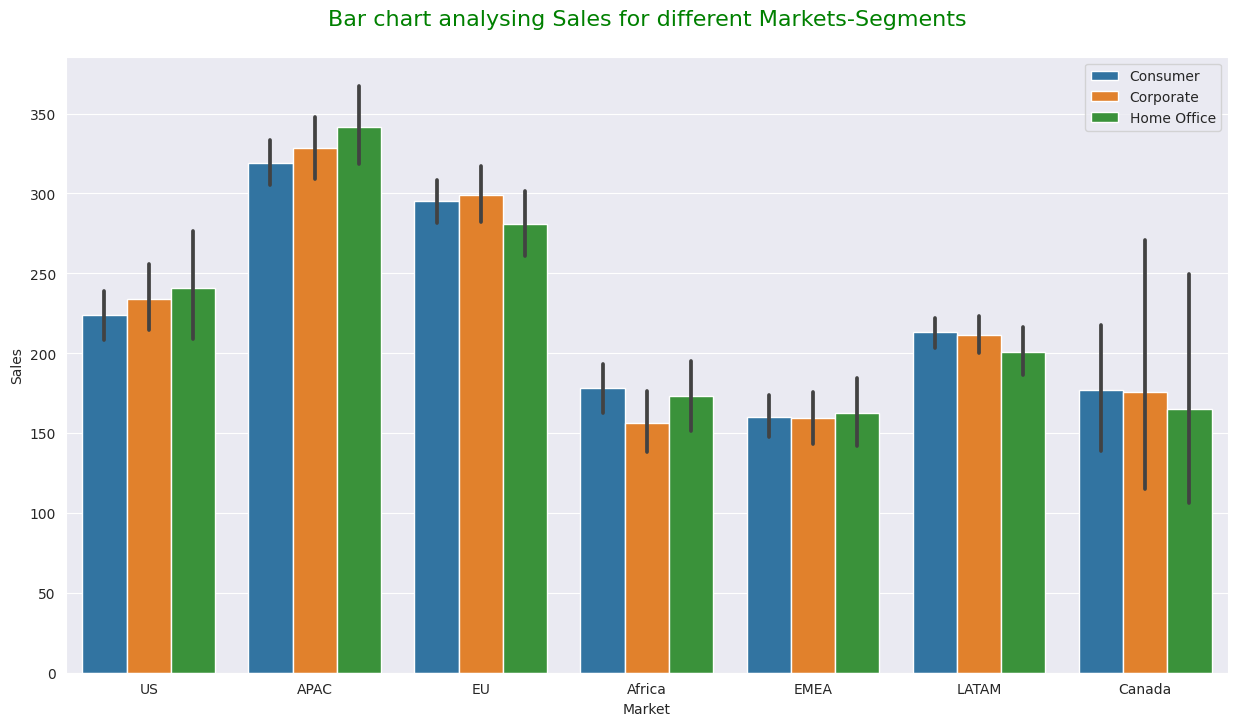

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Sales', hue='Segment')
plt.title('Bar chart analysing Sales for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

Inference: APAC- Home Office is the leading Market-Segment combination in terms of Sales.

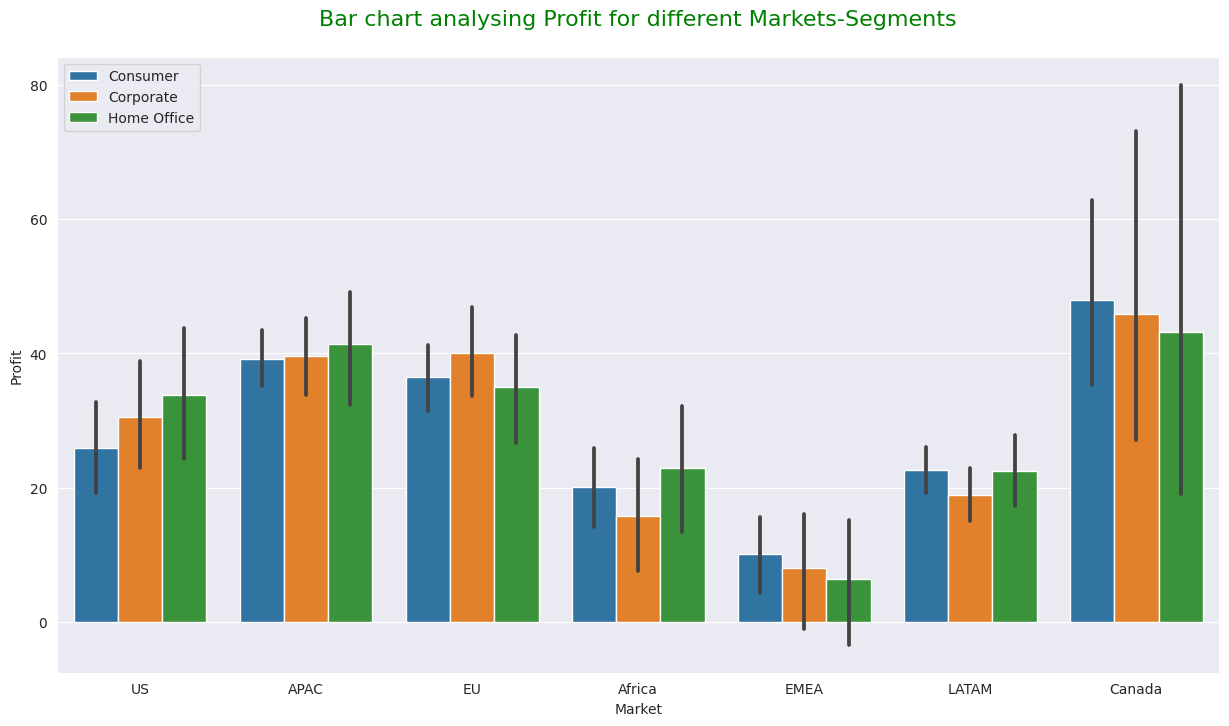

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Profit', hue='Segment')
plt.title('Bar chart analysing Profit for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

Inference: Canada-Consumer is the most profitable market-segment.